In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array(pd.read_csv(r"C:\Users\anpar\Python\ML_Bootcamp_Aadi\Algo\Train_Datasets\Kmean_dataset.csv"))

In [3]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
class Standarize:
    
    mean = std = None
    
    def fit(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        
        
    def fit_transform(self, X):
        self.fit(X)
        X_scaled = (X - self.mean)/self.std
        return X_scaled
        

    def transform(self, X):
        try:
            X_scaled = (X - self.mean)/self.std
            return X_scaled
        except TypeError:
            raise TypeError('No data has been provided to calculate mean and standard deviation')



In [5]:
scalar = Standarize()
X = scalar.fit_transform(X)

In [6]:
def label(X, centroids, clusters):
    distances = np.zeros((X.shape[0], 1))
    for centroid in centroids:
        distance = np.sqrt(np.sum((X-centroid)**2, axis=1).reshape(X.shape[0], 1))
        distances = np.append(distances, distance, axis=1)

    distances = np.delete(distances, 0, axis=1)
    labels = np.argmin(distances, axis=1)
    return labels

In [7]:
def recentre(X, labels):
    centroids = np.zeros((1, X.shape[1]))
    for label in np.unique(labels):
        centroid = np.mean(X[labels == label], axis=0).reshape(1, X.shape[1])
        centroids = np.append(centroids, centroid, axis=0)

    centroids = np.delete(centroids, 0, axis=0)
    return centroids

In [110]:
class KMeans:
    inertia = 0
    
    def __init__(self, clusters):
        self.clusters = clusters

    def fit(self, X, n_iterations=100):
        self.centroids_cords = np.random.randint(0, len(X), self.clusters)
        self.centroids = X[self.centroids_cords]
        for _ in range(n_iterations):
            self.old_centroids = self.centroids
            self.labels = label(X, self.centroids, self.clusters)
            self.centroids = recentre(X, self.labels)
            if self.old_centroids.shape != self.centroids.shape:
                continue
            if (self.old_centroids == self.centroids).all():
                break
        
        for i in np.unique(self.labels):
            self.inertia += np.sum((X[self.labels == i] - self.centroids[i, :])**2)
            
        return self.labels

In [111]:
wcss= []
for i in range(1,11):
    km = KMeans(clusters=i)
    km.fit(X, 100)
    wcss.append(km.inertia)

In [112]:
wcss

[2314.0,
 1659.9511977619795,
 1282.4635183465311,
 1186.4445500282523,
 1162.6174555067917,
 1084.8033689606057,
 1046.902148962543,
 1022.3678574435793,
 987.1628446000019,
 907.9850832199336]

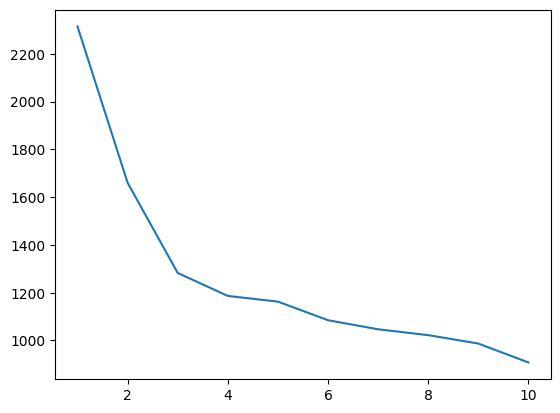

In [113]:
plt.plot(range(1, 11), wcss)

In [114]:
k = 3

In [115]:
model = KMeans(clusters=k)
labels = model.fit(X1)

In [116]:
labels

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)